# Predicting Tomorrow's tesla stock price

Our objective is to predict tomorrow's temperature given 100 number of previous days temperatures. 

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import mean_squared_error


# Common imports
import numpy as np
import os
import datetime as dt
# to make this notebook's output stable across runs
np.random.seed(42)
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
import pandas as pd
import seaborn as sns




In [9]:
Tesla = pd.read_csv("C:/Users/suman/DspData/Tesla.csv")

In [10]:
Tesla

,Date,Open,High,Low,Close,Adj Close,Volume
0,11/28/2022,179.960007,188.500000,179.000000,182.919998,182.919998,92905200
1,11/29/2022,184.990005,186.380005,178.750000,180.830002,180.830002,83357100
2,11/30/2022,182.429993,194.759995,180.630005,194.699997,194.699997,109186400
3,12/1/2022,197.080002,198.919998,191.800003,194.699997,194.699997,80046200
4,12/2/2022,191.779999,196.250000,191.110001,194.860001,194.860001,73645900
...,...,...,...,...,...,...,...
95,4/17/2023,186.320007,189.690002,182.690002,187.039993,187.039993,116662200
96,4/18/2023,187.149994,187.690002,183.580002,184.309998,184.309998,92067000
97,4/19/2023,179.100006,183.500000,177.649994,180.589996,180.589996,125732700
98,4/20/2023,166.169998,169.699997,160.559998,162.990005,162.990005,210970800


In [11]:
Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       100 non-null    object 
 1   Open       100 non-null    float64
 2   High       100 non-null    float64
 3   Low        100 non-null    float64
 4   Close      100 non-null    float64
 5   Adj Close  100 non-null    float64
 6   Volume     100 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.6+ KB


In [12]:
#Drop the columns Date we don't need

Tesla =Tesla[Tesla.columns.difference(['Open', 'High', 'Low', 'Adj Close', 'Volume'])].reset_index()

In [13]:
Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   Close   100 non-null    float64
 2   Date    100 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


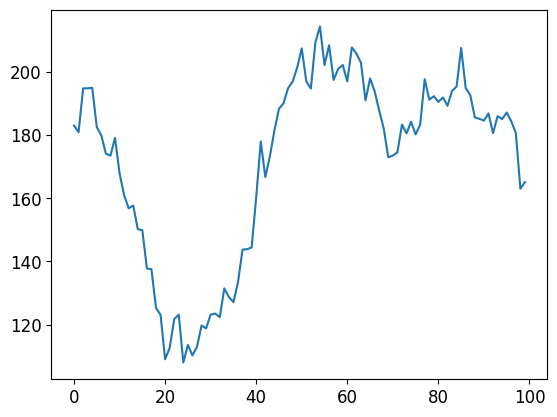

In [14]:
#Plot close

plt.plot(Tesla['Close'])
plt.show()

# RESHAPE the data set!

In [15]:
Tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   100 non-null    int64  
 1   Close   100 non-null    float64
 2   Date    100 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [16]:
Tesla = Tesla.drop(['index'], axis=1)

In [17]:
Tesla.shape

(100, 2)

In [18]:
Tesla.groupby(['Date']).count()

,Close
Date,
1/10/2023,1
1/11/2023,1
1/12/2023,1
1/13/2023,1
1/17/2023,1
...,...
4/21/2023,1
4/3/2023,1
4/4/2023,1


In [20]:
Tesla.head(5)

,Close,Date
0,182.919998,11/28/2022
1,180.830002,11/29/2022
2,194.699997,11/30/2022
3,194.699997,12/1/2022
4,194.860001,12/2/2022


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.

<Axes: xlabel='Date', ylabel='Close'>

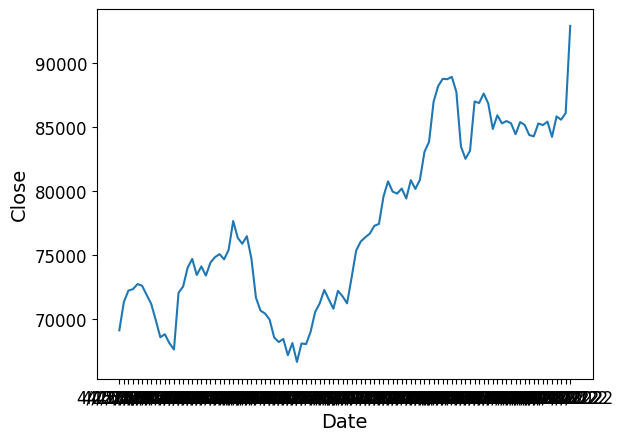

In [95]:
plt.figure
sns.lineplot(x='Date',y='Close',data=Tesla)

In [21]:
Tesla.head(12)

,Close,Date
0,182.919998,11/28/2022
1,180.830002,11/29/2022
2,194.699997,11/30/2022
3,194.699997,12/1/2022
4,194.860001,12/2/2022
5,182.449997,12/5/2022
6,179.820007,12/6/2022
7,174.039993,12/7/2022
8,173.440002,12/8/2022
9,179.050003,12/9/2022


In [22]:
# Re-organize the data set by day and hours

temp = np.array(Tesla['Close']).reshape(10,10)

temp

array([[182.919998, 180.830002, 194.699997, 194.699997, 194.860001,
        182.449997, 179.820007, 174.039993, 173.440002, 179.050003],
       [167.820007, 160.949997, 156.800003, 157.669998, 150.229996,
        149.869995, 137.800003, 137.570007, 125.349998, 123.150002],
       [109.099998, 112.709999, 121.82    , 123.18    , 108.099998,
        113.639999, 110.339996, 113.059998, 119.769997, 118.849998],
       [123.220001, 123.559998, 122.400002, 131.490005, 128.779999,
        127.169998, 133.419998, 143.75    , 143.889999, 144.429993],
       [160.270004, 177.899994, 166.660004, 173.220001, 181.410004,
        188.270004, 189.979996, 194.759995, 196.809998, 201.289993],
       [207.320007, 196.889999, 194.639999, 209.25    , 214.240005,
        202.039993, 208.309998, 197.369995, 200.860001, 202.070007],
       [196.880005, 207.630005, 205.710007, 202.770004, 190.899994,
        197.789993, 193.809998, 187.710007, 182.      , 172.919998],
       [173.440002, 174.479996, 183.25999

In [23]:
Tesla.shape

(100, 2)

In [24]:
# Convert to dataframe

temp_df = pd.DataFrame(temp, columns=np.arange(0,10,1))

temp_df

,0,1,2,3,4,5,6,7,8,9
0,182.919998,180.830002,194.699997,194.699997,194.860001,182.449997,179.820007,174.039993,173.440002,179.050003
1,167.820007,160.949997,156.800003,157.669998,150.229996,149.869995,137.800003,137.570007,125.349998,123.150002
2,109.099998,112.709999,121.820000,123.180000,108.099998,113.639999,110.339996,113.059998,119.769997,118.849998
3,123.220001,123.559998,122.400002,131.490005,128.779999,127.169998,133.419998,143.750000,143.889999,144.429993
4,160.270004,177.899994,166.660004,173.220001,181.410004,188.270004,189.979996,194.759995,196.809998,201.289993
5,207.320007,196.889999,194.639999,209.250000,214.240005,202.039993,208.309998,197.369995,200.860001,202.070007
6,196.880005,207.630005,205.710007,202.770004,190.899994,197.789993,193.809998,187.710007,182.000000,172.919998
7,173.440002,174.479996,183.259995,180.449997,184.130005,180.130005,183.250000,197.580002,191.149994,192.220001
8,190.410004,191.809998,189.190002,193.880005,195.279999,207.460007,194.770004,192.580002,185.520004,185.059998
9,184.509995,186.789993,180.539993,185.899994,185.000000,187.039993,184.309998,180.589996,162.990005,165.080002


### Reshaping for Standardization

In [25]:
# Let's create a single sequence (i.e., feature) for standardization

temp_1feature = np.array(temp_df).ravel().reshape(-1,1)

temp_1feature.shape

(100, 1)

In [26]:
temp_1feature

array([[182.919998],
       [180.830002],
       [194.699997],
       [194.699997],
       [194.860001],
       [182.449997],
       [179.820007],
       [174.039993],
       [173.440002],
       [179.050003],
       [167.820007],
       [160.949997],
       [156.800003],
       [157.669998],
       [150.229996],
       [149.869995],
       [137.800003],
       [137.570007],
       [125.349998],
       [123.150002],
       [109.099998],
       [112.709999],
       [121.82    ],
       [123.18    ],
       [108.099998],
       [113.639999],
       [110.339996],
       [113.059998],
       [119.769997],
       [118.849998],
       [123.220001],
       [123.559998],
       [122.400002],
       [131.490005],
       [128.779999],
       [127.169998],
       [133.419998],
       [143.75    ],
       [143.889999],
       [144.429993],
       [160.270004],
       [177.899994],
       [166.660004],
       [173.220001],
       [181.410004],
       [188.270004],
       [189.979996],
       [194.7

## Standardize the values

In [27]:
# Next, standardize

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

temp_std = scaler.fit_transform(temp_1feature)

In [28]:
temp_reshaped = temp_std.reshape(10,10)

temp_reshaped.shape

(10, 10)

In [29]:
#Pandas version of the reshaped data

pd.DataFrame(temp_reshaped)

,0,1,2,3,4,5,6,7,8,9
0,0.389370,0.318286,0.790026,0.790026,0.795468,0.373385,0.283935,0.087348,0.066942,0.257746
1,-0.124203,-0.357862,-0.499010,-0.469420,-0.722466,-0.734710,-1.145228,-1.153051,-1.568672,-1.643497
2,-2.121359,-1.998577,-1.688732,-1.642477,-2.155370,-1.966946,-2.079184,-1.986673,-1.758456,-1.789746
3,-1.641116,-1.629552,-1.669005,-1.359841,-1.452012,-1.506771,-1.294199,-0.942860,-0.938098,-0.919732
4,-0.380990,0.218633,-0.163656,0.059459,0.338013,0.571332,0.629492,0.792066,0.861790,1.014161
5,1.219251,0.864511,0.787985,1.284893,1.454611,1.039670,1.252922,0.880836,0.999537,1.040691
6,0.864171,1.229795,1.164493,1.064499,0.660782,0.895121,0.759756,0.552286,0.358080,0.049255
7,0.066942,0.102313,0.400934,0.305362,0.430525,0.294479,0.400594,0.887979,0.669285,0.705677
8,0.644117,0.691733,0.602623,0.762137,0.809753,1.224013,0.792407,0.717922,0.477800,0.462155
9,0.443449,0.520995,0.308423,0.490725,0.460114,0.529498,0.436646,0.310124,-0.288479,-0.217395


### Data Split

In [30]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(temp_reshaped, test_size=0.3)

In [31]:
train.shape

(7, 10)

In [32]:
test.shape

(3, 10)

## Create Input and Target values

In [33]:
train_inputs = train[:,:9]


pd.DataFrame(train_inputs)

,0,1,2,3,4,5,6,7,8
0,0.389370,0.318286,0.790026,0.790026,0.795468,0.373385,0.283935,0.087348,0.066942
1,0.066942,0.102313,0.400934,0.305362,0.430525,0.294479,0.400594,0.887979,0.669285
2,-2.121359,-1.998577,-1.688732,-1.642477,-2.155370,-1.966946,-2.079184,-1.986673,-1.758456
3,0.443449,0.520995,0.308423,0.490725,0.460114,0.529498,0.436646,0.310124,-0.288479
4,-0.380990,0.218633,-0.163656,0.059459,0.338013,0.571332,0.629492,0.792066,0.861790
5,-1.641116,-1.629552,-1.669005,-1.359841,-1.452012,-1.506771,-1.294199,-0.942860,-0.938098
6,0.864171,1.229795,1.164493,1.064499,0.660782,0.895121,0.759756,0.552286,0.358080


#### Adding one more dimension  to make it ready for RNNs

In [34]:
train_inputs

array([[ 0.38937039,  0.31828649,  0.79002582,  0.79002582,  0.79546779,
         0.37338495,  0.28393505,  0.0873481 ,  0.06694151],
       [ 0.06694151,  0.10231326,  0.4009342 ,  0.30536195,  0.43052454,
         0.29447854,  0.40059425,  0.88797911,  0.66928489],
       [-2.1213585 , -1.99857696, -1.68873216, -1.64247652, -2.15537   ,
        -1.96694626, -2.07918431, -1.98667297, -1.75845584],
       [ 0.44344857,  0.52099472,  0.30842285,  0.49072452,  0.46011438,
         0.5294976 ,  0.43664637,  0.31012353, -0.28847856],
       [-0.38098987,  0.21863253, -0.16365639,  0.05945895,  0.33801323,
         0.57133211,  0.62949151,  0.79206644,  0.86179012],
       [-1.64111603, -1.62955222, -1.66900542, -1.35984079, -1.45201216,
        -1.50677071, -1.29419884, -0.94285998, -0.9380984 ],
       [ 0.86417116,  1.22979478,  1.16449277,  1.06449886,  0.66078202,
         0.89512122,  0.75975562,  0.55228578,  0.35807988]])

In [35]:
train_inputs.shape 

(7, 9)

In [36]:
#Create an additional dimension for train

train_x = train_inputs[:,:,np.newaxis]

train_x.shape 

(7, 9, 1)

In [37]:
train_x

array([[[ 0.38937039],
        [ 0.31828649],
        [ 0.79002582],
        [ 0.79002582],
        [ 0.79546779],
        [ 0.37338495],
        [ 0.28393505],
        [ 0.0873481 ],
        [ 0.06694151]],

       [[ 0.06694151],
        [ 0.10231326],
        [ 0.4009342 ],
        [ 0.30536195],
        [ 0.43052454],
        [ 0.29447854],
        [ 0.40059425],
        [ 0.88797911],
        [ 0.66928489]],

       [[-2.1213585 ],
        [-1.99857696],
        [-1.68873216],
        [-1.64247652],
        [-2.15537   ],
        [-1.96694626],
        [-2.07918431],
        [-1.98667297],
        [-1.75845584]],

       [[ 0.44344857],
        [ 0.52099472],
        [ 0.30842285],
        [ 0.49072452],
        [ 0.46011438],
        [ 0.5294976 ],
        [ 0.43664637],
        [ 0.31012353],
        [-0.28847856]],

       [[-0.38098987],
        [ 0.21863253],
        [-0.16365639],
        [ 0.05945895],
        [ 0.33801323],
        [ 0.57133211],
        [ 0.62949151],
   

### set the target

In [38]:
train_target = train[:,-1]


pd.DataFrame(train_target, columns=['9'])

,9
0,0.257746
1,0.705677
2,-1.789746
3,-0.217395
4,1.014161
5,-0.919732
6,0.049255


### Repeat for test

In [39]:
test.shape

(3, 10)

In [40]:
# The first 9 columns (from 0 to 8) are inputs

test_inputs = test[:,:9]

In [41]:
#Create an additional dimension for test

test_x = test_inputs[...,np.newaxis]

test_x.shape 

(3, 9, 1)

In [42]:
# The last column (9) is TARGET

test_target = test[:,-1]


pd.DataFrame(test_target, columns=['9'])

,9
0,0.462155
1,-1.643497
2,1.040691


# A normal (cross-sectional) NN

In [43]:
model = keras.models.Sequential([
    
    keras.layers.Flatten(input_shape=[9, 1]),
    keras.layers.Dense(23, activation='relu'),
    keras.layers.Dense(1, activation=None)
    
])

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 364ms/step - loss: 0.4245
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 0.4040
Epoch 3/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3858
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3699
Epoch 5/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3562
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3442
Epoch 7/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3339
Epoch 8/100
1/1 [==============================] - 0s 4ms/step - loss: 0.3247
Epoch 9/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3162
Epoch 10/100
1/1 [==============================] - 0s 6ms/step - loss: 0.3082
Epoch 11/100
1/1 [==============================] - 0s 5ms/step - loss: 0.3004
Epoch 12/100
1/1 [==============================] - 0s 7ms/step - loss: 0.2929
Epoch 13/100
1/1 [==============================] - 0s 4ms/

### Predictions

In [44]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 81ms/step


In [45]:
# Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [46]:
comparison

,actual,predicted
0,185.059998,183.760193
1,123.150002,164.078796
2,202.070007,183.664612


In [47]:
mean_squared_error(comparison['actual'], comparison['predicted'])

671.8714250625625

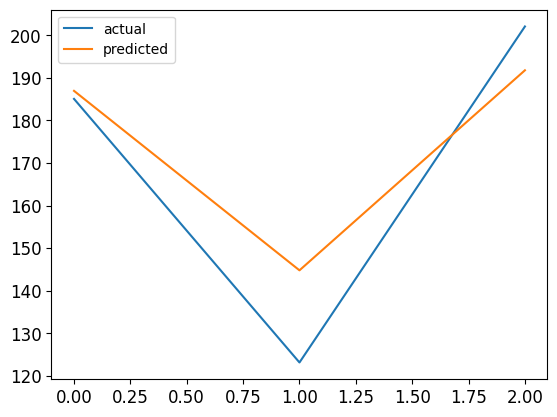

In [104]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

nn=plt.show()

## Simple RNN

In [49]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [50]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 740ms/step - loss: 0.5696
Epoch 2/30
1/1 [==============================] - 0s 6ms/step - loss: 0.5134
Epoch 3/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4668
Epoch 4/30
1/1 [==============================] - 0s 6ms/step - loss: 0.4244
Epoch 5/30
1/1 [==============================] - 0s 6ms/step - loss: 0.3847
Epoch 6/30
1/1 [==============================] - 0s 5ms/step - loss: 0.3465
Epoch 7/30
1/1 [==============================] - 0s 6ms/step - loss: 0.3121
Epoch 8/30
1/1 [==============================] - 0s 5ms/step - loss: 0.2826
Epoch 9/30
1/1 [==============================] - 0s 7ms/step - loss: 0.2553
Epoch 10/30
1/1 [==============================] - 0s 8ms/step - loss: 0.2309
Epoch 11/30
1/1 [==============================] - 0s 7ms/step - loss: 0.2090
Epoch 12/30
1/1 [==============================] - 0s 8ms/step - loss: 0.1890
Epoch 13/30
1/1 [==============================] - 0s 8ms/step - loss: 

### Predictions

In [51]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 131ms/step


In [52]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [53]:
comparison

,actual,predicted
0,185.059998,183.321259
1,123.150002,136.302536
2,202.070007,190.288116


In [54]:
mean_squared_error(comparison['actual'], comparison['predicted'])

104.94177020296497

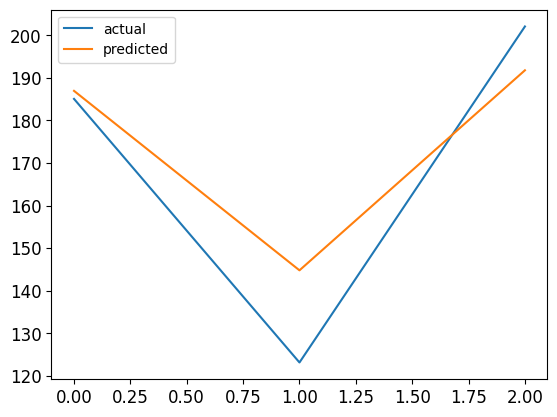

In [91]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

rnn=plt.show()

##  Simple RNN with more layers

In [56]:
model = keras.models.Sequential([
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.SimpleRNN(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [57]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 0.7156
Epoch 2/30
1/1 [==============================] - 0s 8ms/step - loss: 0.6556
Epoch 3/30
1/1 [==============================] - 0s 9ms/step - loss: 0.6021
Epoch 4/30
1/1 [==============================] - 0s 10ms/step - loss: 0.5505
Epoch 5/30
1/1 [==============================] - 0s 9ms/step - loss: 0.5069
Epoch 6/30
1/1 [==============================] - 0s 10ms/step - loss: 0.4658
Epoch 7/30
1/1 [==============================] - 0s 8ms/step - loss: 0.4289
Epoch 8/30
1/1 [==============================] - 0s 7ms/step - loss: 0.3953
Epoch 9/30
1/1 [==============================] - 0s 9ms/step - loss: 0.3639
Epoch 10/30
1/1 [==============================] - 0s 10ms/step - loss: 0.3327
Epoch 11/30
1/1 [==============================] - 0s 7ms/step - loss: 0.3015
Epoch 12/30
1/1 [==============================] - 0s 8ms/step - loss: 0.2718
Epoch 13/30
1/1 [==============================] - 0s 9ms/step - loss: 

In [58]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 269ms/step


In [59]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [60]:
comparison

,actual,predicted
0,185.059998,178.764664
1,123.150002,140.472488
2,202.070007,182.837296


In [61]:
mean_squared_error(comparison['actual'], comparison['predicted'])

236.53231986377364

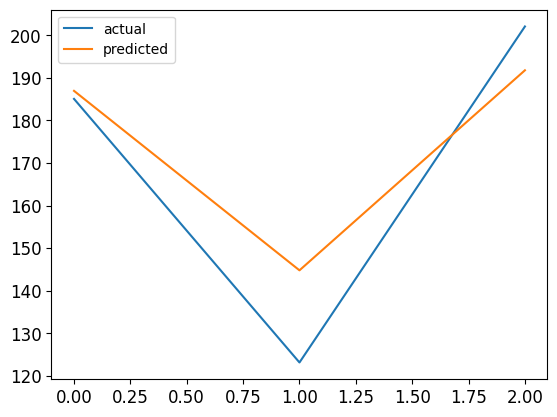

In [93]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

rnn_layers =plt.show()

# LSTM with one layer

In [63]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='relu', input_shape=[9, 1]),
    keras.layers.Dense(1, activation=None)
])

In [64]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 1s 1s/step - loss: 1.0297
Epoch 2/30
1/1 [==============================] - 0s 6ms/step - loss: 0.9925
Epoch 3/30
1/1 [==============================] - 0s 22ms/step - loss: 0.9575
Epoch 4/30
1/1 [==============================] - 0s 23ms/step - loss: 0.9244
Epoch 5/30
1/1 [==============================] - 0s 14ms/step - loss: 0.8936
Epoch 6/30
1/1 [==============================] - 0s 9ms/step - loss: 0.8644
Epoch 7/30
1/1 [==============================] - 0s 11ms/step - loss: 0.8365
Epoch 8/30
1/1 [==============================] - 0s 18ms/step - loss: 0.8095
Epoch 9/30
1/1 [==============================] - 0s 9ms/step - loss: 0.7833
Epoch 10/30
1/1 [==============================] - 0s 14ms/step - loss: 0.7579
Epoch 11/30
1/1 [==============================] - 0s 9ms/step - loss: 0.7332
Epoch 12/30
1/1 [==============================] - 0s 9ms/step - loss: 0.7093
Epoch 13/30
1/1 [==============================] - 0s 8ms/step - los

### Predict

In [65]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 158ms/step


In [66]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [67]:
comparison

,actual,predicted
0,185.059998,176.390686
1,123.150002,160.406158
2,202.070007,178.653137


In [68]:
mean_squared_error(comparison['actual'], comparison['predicted'])

670.5093180225892

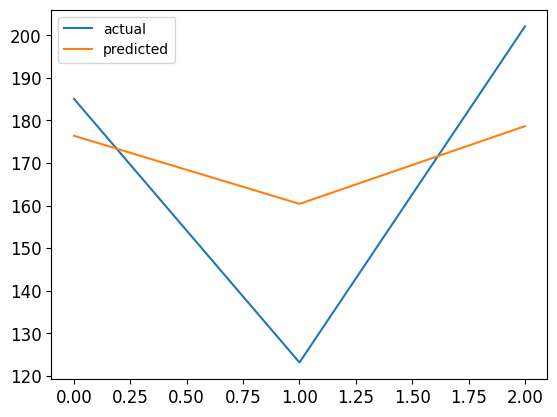

In [69]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### LSTM with more layers

In [70]:
model = keras.models.Sequential([
    keras.layers.LSTM(32, activation='tanh', return_sequences=True, input_shape=[9, 1]),
    keras.layers.LSTM(32, activation='tanh', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [71]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.5974
Epoch 2/30
1/1 [==============================] - 0s 12ms/step - loss: 0.5421
Epoch 3/30
1/1 [==============================] - 0s 13ms/step - loss: 0.4903
Epoch 4/30
1/1 [==============================] - 0s 13ms/step - loss: 0.4423
Epoch 5/30
1/1 [==============================] - 0s 15ms/step - loss: 0.3982
Epoch 6/30
1/1 [==============================] - 0s 15ms/step - loss: 0.3584
Epoch 7/30
1/1 [==============================] - 0s 14ms/step - loss: 0.3233
Epoch 8/30
1/1 [==============================] - 0s 71ms/step - loss: 0.2933
Epoch 9/30
1/1 [==============================] - 0s 17ms/step - loss: 0.2689
Epoch 10/30
1/1 [==============================] - 0s 22ms/step - loss: 0.2503
Epoch 11/30
1/1 [==============================] - 0s 15ms/step - loss: 0.2378
Epoch 12/30
1/1 [==============================] - 0s 15ms/step - loss: 0.2312
Epoch 13/30
1/1 [==============================] - 0s 14ms/step

### Predcitions

In [72]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 1s 725ms/step


In [73]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [74]:
comparison

,actual,predicted
0,185.059998,185.327255
1,123.150002,159.970215
2,202.070007,187.752625


In [75]:
mean_squared_error(comparison['actual'], comparison['predicted'])

520.2623138706502

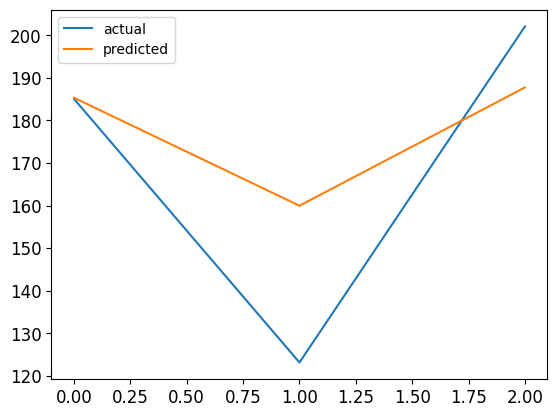

In [76]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### GRU (with more layers)

In [77]:
model = keras.models.Sequential([
    keras.layers.GRU(32, activation='relu', return_sequences=True, input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [78]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='RMSprop')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 2s 2s/step - loss: 0.7704
Epoch 2/30
1/1 [==============================] - 0s 9ms/step - loss: 0.7111
Epoch 3/30
1/1 [==============================] - 0s 14ms/step - loss: 0.6714
Epoch 4/30
1/1 [==============================] - 0s 11ms/step - loss: 0.6413
Epoch 5/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6171
Epoch 6/30
1/1 [==============================] - 0s 15ms/step - loss: 0.5910
Epoch 7/30
1/1 [==============================] - 0s 14ms/step - loss: 0.5662
Epoch 8/30
1/1 [==============================] - 0s 17ms/step - loss: 0.5434
Epoch 9/30
1/1 [==============================] - 0s 14ms/step - loss: 0.5228
Epoch 10/30
1/1 [==============================] - 0s 16ms/step - loss: 0.5013
Epoch 11/30
1/1 [==============================] - 0s 14ms/step - loss: 0.4810
Epoch 12/30
1/1 [==============================] - 0s 18ms/step - loss: 0.4610
Epoch 13/30
1/1 [==============================] - 0s 17ms/step 

### Predictions

In [79]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 285ms/step


In [80]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [81]:
comparison

,actual,predicted
0,185.059998,179.823563
1,123.150002,148.716461
2,202.070007,181.790756


In [82]:
mean_squared_error(comparison['actual'], comparison['predicted'])

364.10403417510116

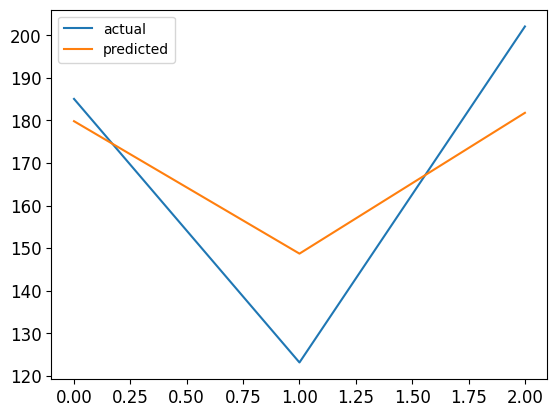

In [83]:
plt.plot(comparison['actual'], label = 'actual')
plt.plot(comparison['predicted'], label = 'predicted')

plt.legend()

plt.show()

### Conv1D

In [84]:
model = keras.models.Sequential([
    keras.layers.Conv1D(filters=20, kernel_size=3, strides=1, padding="valid", input_shape=[9, 1]),
    keras.layers.GRU(32, activation='relu', return_sequences=True),
    keras.layers.GRU(32, activation='relu', return_sequences=False),
    keras.layers.Dense(1, activation=None)
])

In [85]:
np.random.seed(42)
tf.random.set_seed(42)

model.compile(loss="mse", optimizer='Adam')

history = model.fit(train_x, train_target, epochs=30)

Epoch 1/30
1/1 [==============================] - 3s 3s/step - loss: 0.7298
Epoch 2/30
1/1 [==============================] - 0s 9ms/step - loss: 0.6967
Epoch 3/30
1/1 [==============================] - 0s 11ms/step - loss: 0.6667
Epoch 4/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6398
Epoch 5/30
1/1 [==============================] - 0s 13ms/step - loss: 0.6161
Epoch 6/30
1/1 [==============================] - 0s 17ms/step - loss: 0.5934
Epoch 7/30
1/1 [==============================] - 0s 16ms/step - loss: 0.5703
Epoch 8/30
1/1 [==============================] - 0s 13ms/step - loss: 0.5469
Epoch 9/30
1/1 [==============================] - 0s 18ms/step - loss: 0.5230
Epoch 10/30
1/1 [==============================] - 0s 15ms/step - loss: 0.4990
Epoch 11/30
1/1 [==============================] - 0s 22ms/step - loss: 0.4746
Epoch 12/30
1/1 [==============================] - 0s 17ms/step - loss: 0.4498
Epoch 13/30
1/1 [==============================] - 0s 14ms/step 

### Predictions

In [86]:
#Predict:
y_pred = model.predict(test_x)

1/1 [==============================] - 0s 281ms/step


In [87]:
#Remember, these are standardized values. 

comparison = pd.DataFrame()

comparison['actual'] = scaler.inverse_transform([test_target]).flatten()
comparison['predicted'] = scaler.inverse_transform(y_pred).flatten()

In [88]:
comparison

,actual,predicted
0,185.059998,186.948044
1,123.150002,144.794586
2,202.070007,191.778061


In [89]:
mean_squared_error(comparison['actual'], comparison['predicted'])

192.6589652275785

### In this case Simple RNN  performed better than other models with less rmse value

* Normal NN	                671.8714251
* Simple RNN	            104.9417702
* Simple RNN-More layers	236.5323199
* LTSM with 1 layer	        670.509318
* LTSM with more layers	    520.2623139
* GRU with more layers	    364.1040342
* Conv1D	                192.6589652


The following may be inferred from the study above.

-> The best RMSE value in the group is 104.9417702 for Simple RNN.

-> RNNs with a single layer have outperformed RNNs with many layers.

-> The RMSE of the LSTM model with a single layer is 670.509318, and when more layers are added, the RMSE decreases to 520.2623139. This shows that the LSTM handled the provided data successfully while using many layers.

-> The RMSE values for normal NN are much higher, at 671.8714251.


